In [201]:
import pandas as pd
import seaborn
import re


In [202]:
laptop_details=pd.read_csv("laptop_details.csv")
print(laptop_details.shape)

laptop_details=laptop_details.drop_duplicates()
print(laptop_details.shape)

(720, 4)
(423, 4)


In [203]:
laptop_details['MRP']=laptop_details['MRP'].apply(lambda x: x.replace("₹",''))
laptop_details['MRP']=laptop_details['MRP'].apply(lambda x: x.replace(",",''))
laptop_details['MRP']=pd.to_numeric(laptop_details['MRP'])
laptop_details.describe()

,Rating,MRP
count,339.000000,423.000000
mean,4.316224,81546.262411
std,0.299905,62526.140483
min,3.000000,14990.000000
25%,4.200000,41745.000000
50%,4.300000,61497.000000
75%,4.500000,94990.000000
max,5.000000,434830.000000


In [204]:
laptop_details.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [205]:
laptop_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 4 columns):
Product    423 non-null object
Rating     339 non-null float64
MRP        423 non-null int64
Feature    423 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ KB


142485.0
(51, 4)


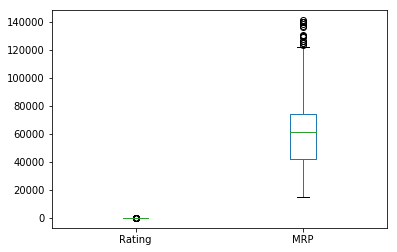

In [206]:
# laptop_details_copy.plot(kind='box')
#MRP is having more outliers
mrp_upper_bound=laptop_details['MRP'].quantile(0.75)*1.5
print(mrp_upper_bound)
print(laptop_details[laptop_details['MRP']>mrp_upper_bound].shape)
laptop_details['MRP']=laptop_details['MRP'].apply(lambda x : laptop_details['MRP'].median() if x > mrp_upper_bound else x)
# print(laptop_details[laptop_details['MRP']>mrp_upper_bound].shape)
laptop_details.plot(kind='box')


In [207]:
laptop_details.describe()

,Rating,MRP
count,339.000000,423.000000
mean,4.316224,62312.784870
std,0.299905,26842.298287
min,3.000000,14990.000000
25%,4.200000,41745.000000
50%,4.300000,61497.000000
75%,4.500000,73990.000000
max,5.000000,140990.000000


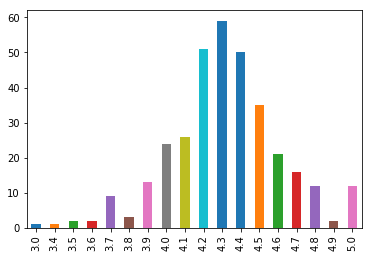

In [208]:
laptop_details['Rating'].value_counts().sort_index().plot(kind='bar')

Observation: Rating follows the normal distribution

In [209]:
print(laptop_details.Feature.values[:1])

['Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty']


In [210]:
laptop_details_copy=laptop_details.copy()

In [211]:
laptop_details_copy['processor']=laptop_details_copy['Feature'].apply(lambda x: re.findall(r'[A-Za-z0-9 ]*Processor',x)[0])

In [212]:
regex=r'([0-9a-zA-z]+ Gen)'
def preprocess_fun(regex,x):
    regex_output=re.findall(regex,x)
    try:
        return ''.join(regex_output)
    except:
        return 0
laptop_details_copy['processor_gen']=laptop_details_copy['Feature'].apply(lambda x: preprocess_fun(regex,x))

In [213]:
regex=r'([0-9]+ GB [0-9a-zA-z]+ RAM)'
laptop_details_copy['RAM']=laptop_details_copy['Feature'].apply(lambda x:preprocess_fun(regex,x))

In [214]:
regex=r'[0-9]+ bit Windows [0-9]+ Operating System'
laptop_details_copy['OS']=laptop_details_copy['Feature'].apply(lambda x:preprocess_fun(regex,x))

In [215]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
laptop_details_copy['Storage'] = laptop_details_copy['Feature'].apply(lambda x : preprocess_fun(regex,x))

In [216]:
regex = r'^[a-zA-Z]+'
laptop_details_copy['Brand'] = laptop_details_copy['Product'].apply(lambda x : preprocess_fun(regex,x))

In [217]:
laptop_details_copy.head()

,Product,Rating,MRP,Feature,processor,processor_gen,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,10th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,10th Gen,8 GB DDR4 RAM,,512 GB SSD,ASUS


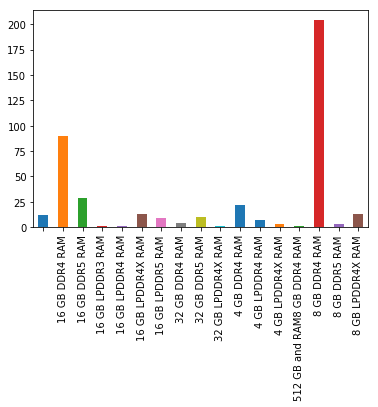

In [218]:
laptop_details_copy['RAM'].value_counts().sort_index().plot(kind='bar')

Observation :  8 GB DDR4 RAM is mostly used of the Many RAM's given

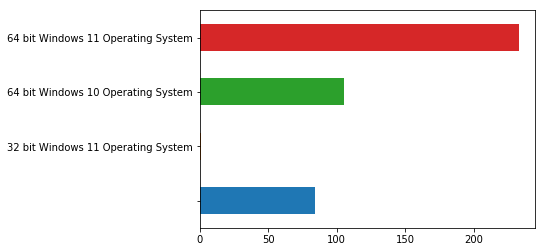

In [219]:
laptop_details_copy['OS'].value_counts().sort_index().plot(kind='barh')

Observation: 64 bit Windows 11 Operating System is mostly used

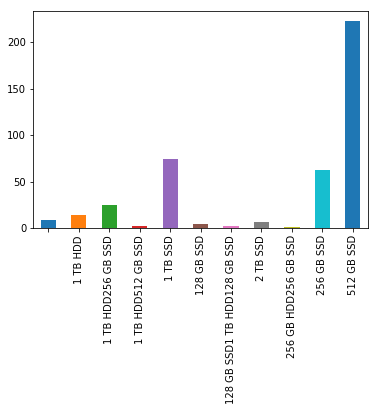

In [220]:
laptop_details_copy['Storage'].value_counts().sort_index().plot(kind='bar')

512 GB SSD is used in most of the laptops

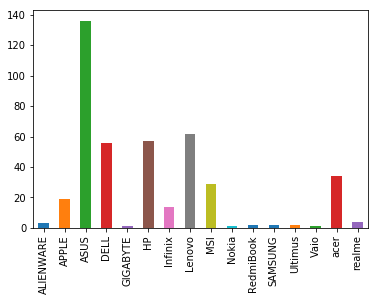

In [221]:
laptop_details_copy['Brand'].value_counts().sort_index().plot(kind='bar')

ASUS laptops data are most repeated

In [222]:
laptop_details_copy.head()

,Product,Rating,MRP,Feature,processor,processor_gen,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,10th Gen,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,10th Gen,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [223]:
laptop_details_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 10 columns):
Product          423 non-null object
Rating           339 non-null float64
MRP              423 non-null float64
Feature          423 non-null object
processor        423 non-null object
processor_gen    423 non-null object
RAM              423 non-null object
OS               423 non-null object
Storage          423 non-null object
Brand            423 non-null object
dtypes: float64(2), object(8)
memory usage: 36.4+ KB


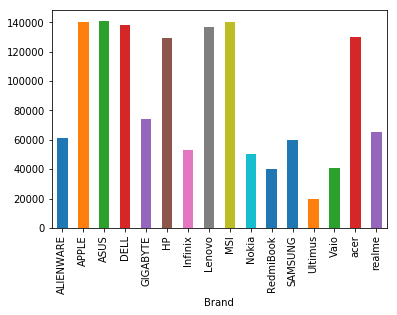

In [224]:

laptop_details_copy.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

Max price is for dell laptop

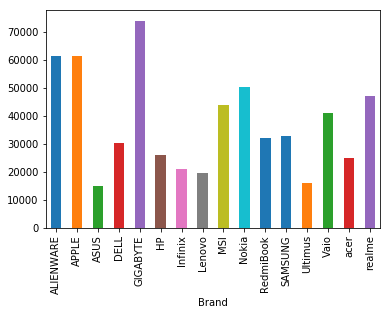

In [225]:
laptop_details_copy.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')

Minimum price is for ASUS laptop

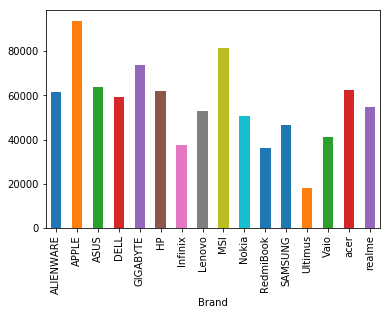

In [226]:
laptop_details_copy.groupby(['Brand'])['MRP'].mean().plot(kind = 'bar')

Avg price is High for ALIENWARE AND less for Ultimus

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


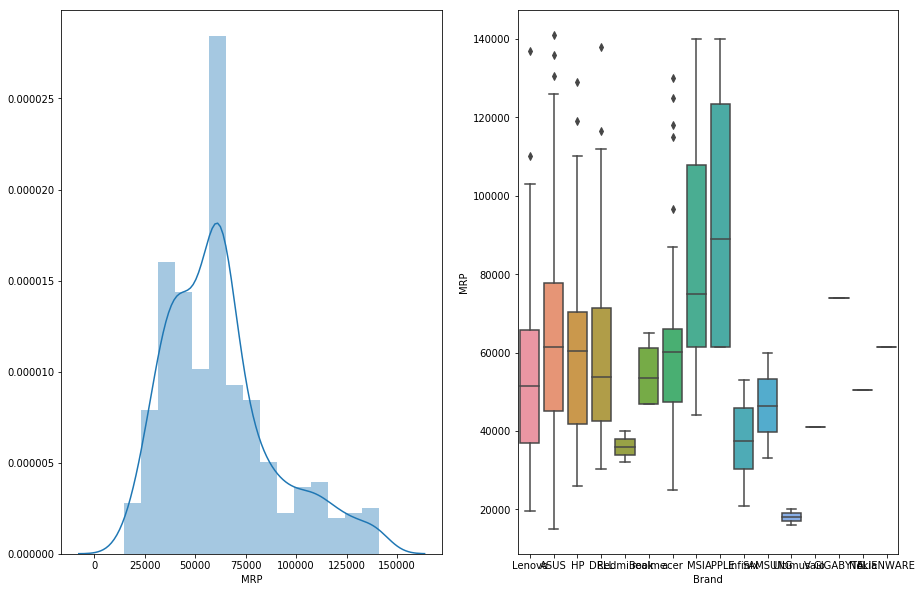

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
g = seaborn.distplot(laptop_details_copy.MRP)
plt.subplot(1,2,2)
seaborn.boxplot(x = laptop_details_copy.Brand, y = laptop_details_copy.MRP)

In [228]:
laptop_details_copy.to_csv("resources/data/laptop_details_copy.csv",index=False)